In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [8]:
matches = pd.read_csv(r"A:\ipl-data (1)\matches.csv")
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [9]:
deliveries = pd.read_csv(r"A:\ipl-data (1)\deliveries.csv")
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [5]:
matches.toss_decision.value_counts(normalize = True)

field    0.570755
bat      0.429245
Name: toss_decision, dtype: float64

In [ ]:
temp_series = matches.toss_decision.value_counts(normalize = True)
#print temp_series

In [14]:
np.array(temp_series.index)

array(['field', 'bat'], dtype=object)

In [15]:
np.array(temp_series)

array([0.57075472, 0.42924528])

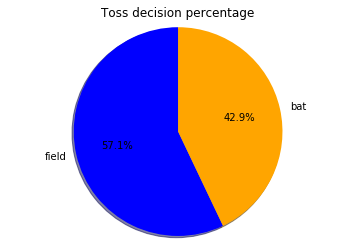

In [13]:
#overall toss_decision

#print temp_series
labels = (np.array(temp_series.index))
sizes = (np.array(temp_series))
#print sizes
#colors = ['gold', 'lightskyblue']
plt.axis("equal")
plt.pie(sizes, labels=labels, colors=['blue','orange'],
    autopct='%1.1f%%', shadow=True, startangle=90,radius =1.2)
plt.title("Toss decision percentage")
plt.show()

In [19]:
pd.crosstab(matches.venue,matches.toss_decision).sort_values('field',ascending = False).iloc[[0,1,2,3,5,6,7],:]


toss_decision,bat,field
venue,,
M Chinnaswamy Stadium,9,57
Wankhede Stadium,21,36
Feroz Shah Kotla,26,34
Eden Gardens,28,33
"Punjab Cricket Association Stadium, Mohali",14,21
Sawai Mansingh Stadium,14,19
"MA Chidambaram Stadium, Chepauk",34,14


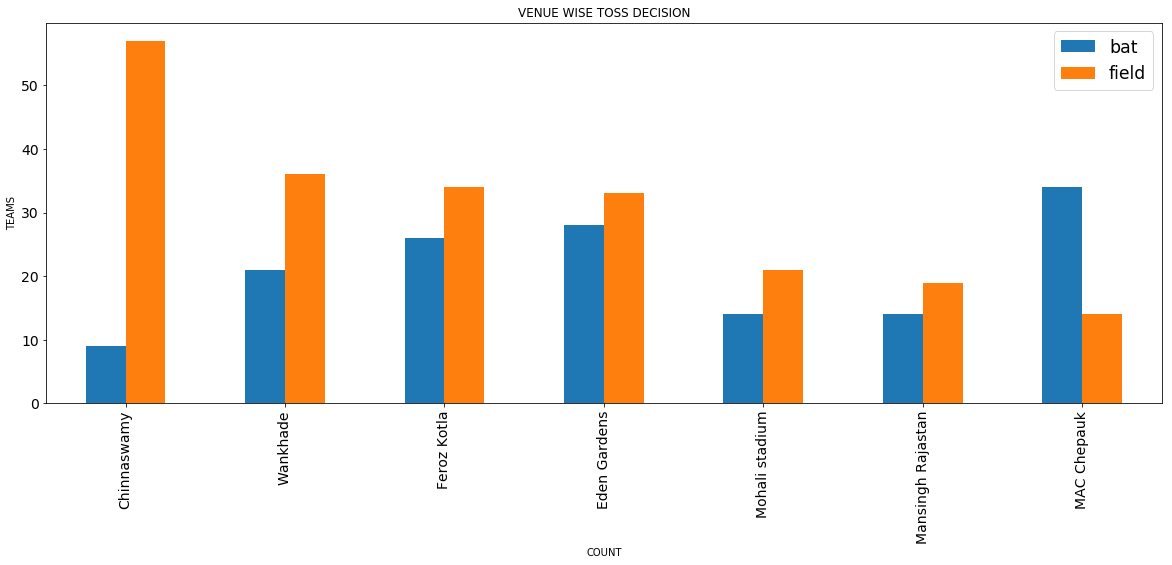

In [21]:
#venuewise
venue_wise =pd.crosstab(matches.venue,matches.toss_decision).sort_values('field',ascending = False).iloc[[0,1,2,3,5,6,7],:]
venue_wise.index =['Chinnaswamy','Wankhade','Feroz Kotla','Eden Gardens','Mohali stadium','Mansingh Rajastan','MAC Chepauk']
venue_wise.plot(kind ='bar',figsize=(20,7))
plt.ylabel("COUNT")
plt.xlabel('LABELS')
plt.title("VENUE WISE TOSS DECISION")
plt.legend(fontsize ='xx-large')
plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14)
#plt.savefig(R"C:\Users\mira\Pictures\SnippingTool++\Captures\venue_wise.png",pad_inches=3)
plt.show()

In [23]:
pd.crosstab(matches.toss_winner,matches.toss_decision)

toss_decision,bat,field
toss_winner,,
Chennai Super Kings,44,22
Deccan Chargers,24,19
Delhi Daredevils,26,46
Gujarat Lions,1,14
Kings XI Punjab,25,43
Kochi Tuskers Kerala,3,5
Kolkata Knight Riders,30,48
Mumbai Indians,40,45
Pune Warriors,11,9


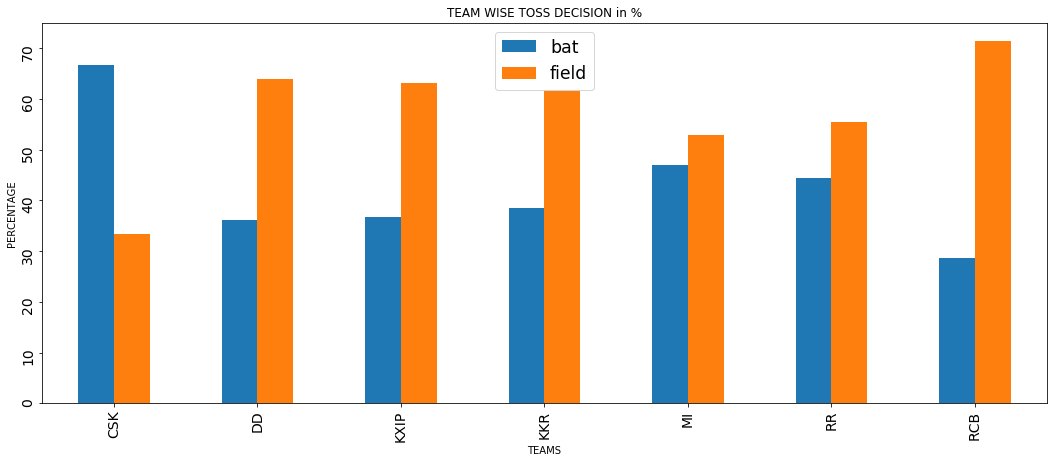

In [25]:
#teamwise toss
teamwise = pd.crosstab(matches.toss_winner,matches.toss_decision).iloc[[0,2,4,6,7,9,12],:]
teamwise

teamwise['total'] = teamwise['bat'] + teamwise['field']
teamwise['total'] = teamwise['total'].astype('float')
teamwise['bat'] = (teamwise['bat']/teamwise['total']) * 100
teamwise['field']=(teamwise['field']/teamwise['total']) * 100
teamwise

teamwise.drop("total",inplace=True,axis=1)
teamwise =teamwise.applymap(lambda x:round(x,2))


teamwise.index = ['CSK','DD','KXIP','KKR','MI','RR','RCB']
ax =teamwise.plot(kind ='bar',figsize=(18,7))
"""for p in ax.patches:
    ax.annotate(format(p.get_height()+1), (p.get_x()+0.1, p.get_height()+1))"""
plt.xlabel("TEAMS")
plt.ylabel('PERCENTAGE')
plt.title("TEAM WISE TOSS DECISION in %")
plt.legend(fontsize ='xx-large')
plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14, rotation=90)
#plt.savefig(R"C:\Users\mira\Pictures\SnippingTool++\Captures\teamwise.png")
plt.show()

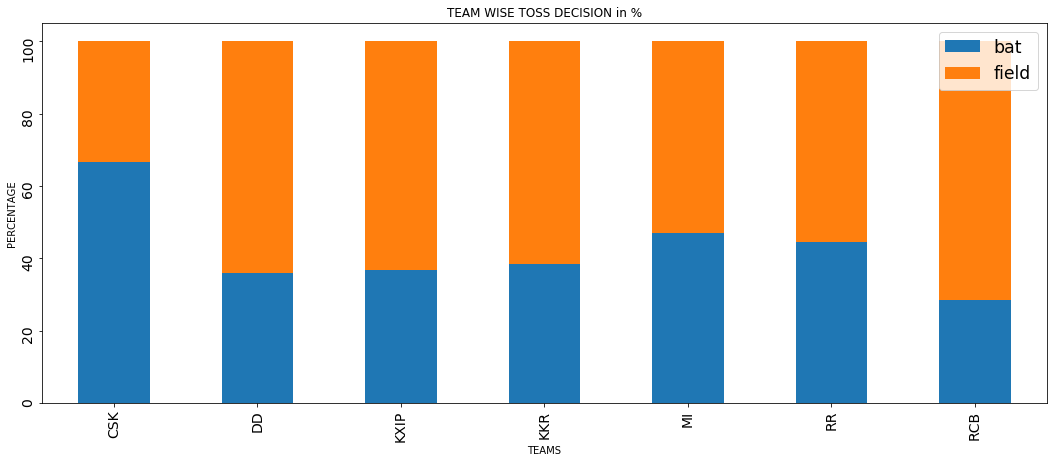

In [15]:
#teamwise toss
teamwise = pd.crosstab(matches.toss_winner,matches.toss_decision).iloc[[0,2,4,6,7,9,12],:]
teamwise

teamwise['total'] = teamwise['bat'] + teamwise['field']
teamwise['total'] = teamwise['total'].astype('float')
teamwise['bat'] = (teamwise['bat']/teamwise['total']) * 100
teamwise['field']=(teamwise['field']/teamwise['total']) * 100
teamwise

teamwise.drop("total",inplace=True,axis=1)
teamwise =teamwise.applymap(lambda x:round(x,2))


teamwise.index = ['CSK','DD','KXIP','KKR','MI','RR','RCB']
ax =teamwise.plot(kind ='bar',figsize=(18,7),stacked=True)
"""for p in ax.patches:
    ax.annotate(format(p.get_height()+1), (p.get_x()+0.1, p.get_height()+1))"""
plt.xlabel("TEAMS")
plt.ylabel('PERCENTAGE')
plt.title("TEAM WISE TOSS DECISION in %")
plt.legend(fontsize ='xx-large')
plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14, rotation=90)
#plt.savefig(R"C:\Users\mira\Pictures\SnippingTool++\Captures\teamwise.png")
plt.show()

In [2]:
loan = pd.read_csv("A:\Hari\Loan.csv")
loan

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


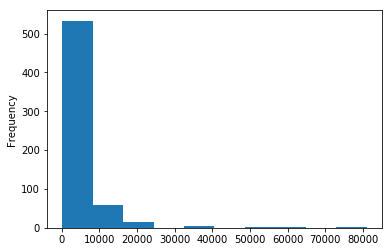

In [3]:
loan.ApplicantIncome.plot(kind = 'hist')

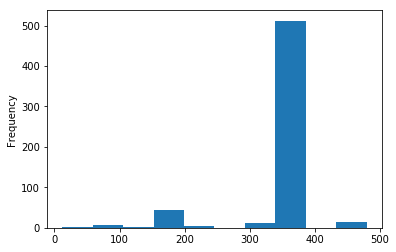

In [7]:
loan.Loan_Amount_Term.plot(kind = 'hist')
plt.show()

In [10]:
batsman_runs = deliveries.pivot_table(index=['batsman'],columns='batsman_runs',values='ball',aggfunc=len)
any_batsman = batsman_runs.loc[batsman_runs.index.str.contains('Raina',case=False)].T
any_batsman

batsman,SK Raina
batsman_runs,
0,1163.0
1,1377.0
2,242.0
3,10.0
4,402.0
5,1.0
6,174.0


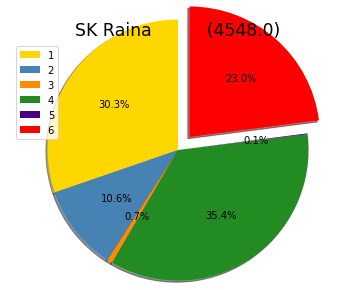

In [11]:
#individual player wagon wheel
title = any_batsman.columns[0]
any_batsman.columns = ['RUNS']
any_batsman['RUNS'] = any_batsman['RUNS'] * any_batsman.index
any_batsman.fillna(0,inplace=True)
import numpy as np
labels = any_batsman.index[1:]
sizes = any_batsman.RUNS.values[1:]


#plt.subplot(211)
#plt.figure(figsize=(5,6))
colors = ['gold', '#4682B4','#FF8C00','#228B22','#4B0082','#FF0000']
plt.axis('equal')
plt.pie(sizes,colors=colors,
    autopct='%1.1f%%', shadow=True, startangle=90,radius = 1.5,explode  =[0,0,0,0,0,0.2])
plt.title(title+ 10 * ' '+'(' +str(sizes.sum()) + ')',fontsize ='xx-large')
plt.legend(labels)
#plt.savefig(R"C:\Users\mira\Pictures\SnippingTool++\Captures\dhoni.png",pad_inches=1)
plt.show()